<a target="_blank" href="https://colab.research.google.com/github/shaankhosla/semanticsearch/blob/main/notebooks/Embedding_Size.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [4]:
%%capture

%pip install sentence_transformers
import numpy as np
from time import time
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import nltk
nltk.download("brown")
from nltk.corpus import brown

In [7]:
# Data preparation
sentences = [" ".join(sent) for sent in brown.sents()][:2000]

In [8]:
embedding_model = SentenceTransformer("all-mpnet-base-v2")
embeddings = embedding_model.encode(
    sentences=sentences, convert_to_numpy=True, show_progress_bar=True
)
query_embedding, index_embeddings = embeddings[0], embeddings[1:]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [9]:
print(query_embedding.shape, index_embeddings.shape)

(768,) (1999, 768)


In [10]:
# Semantic search function


def semantic_search(query_embedding, embeddings):
    similarities = cosine_similarity([query_embedding], embeddings)
    return np.argsort(-similarities[0])

In [11]:
embedding_sizes = list(range(25, query_embedding.shape[0], 25))
times = []
n_repeat = 500

for size in embedding_sizes:
    # Generate embeddings
    query_embedding_reduced = query_embedding[:size]

    # Reduce the dimension of the query embedding to match the current size
    index_embeddings_reduced = index_embeddings[:, :size]

    # Perform semantic search and measure time
    start_time = time()
    for i in range(n_repeat):
        semantic_search(query_embedding_reduced, index_embeddings_reduced)
    end_time = time()

    time_taken = (end_time - start_time) / n_repeat
    print(f"Embedding Size: {size}, Time taken: {time_taken:.4f} seconds\n")
    times.append(time_taken)

Embedding Size: 25, Time taken: 0.0012 seconds

Embedding Size: 50, Time taken: 0.0013 seconds

Embedding Size: 75, Time taken: 0.0016 seconds

Embedding Size: 100, Time taken: 0.0017 seconds

Embedding Size: 125, Time taken: 0.0019 seconds

Embedding Size: 150, Time taken: 0.0021 seconds

Embedding Size: 175, Time taken: 0.0034 seconds

Embedding Size: 200, Time taken: 0.0048 seconds

Embedding Size: 225, Time taken: 0.0052 seconds

Embedding Size: 250, Time taken: 0.0044 seconds

Embedding Size: 275, Time taken: 0.0030 seconds

Embedding Size: 300, Time taken: 0.0031 seconds

Embedding Size: 325, Time taken: 0.0033 seconds

Embedding Size: 350, Time taken: 0.0034 seconds

Embedding Size: 375, Time taken: 0.0037 seconds

Embedding Size: 400, Time taken: 0.0052 seconds

Embedding Size: 425, Time taken: 0.0073 seconds

Embedding Size: 450, Time taken: 0.0044 seconds

Embedding Size: 475, Time taken: 0.0048 seconds

Embedding Size: 500, Time taken: 0.0047 seconds

Embedding Size: 525, Ti

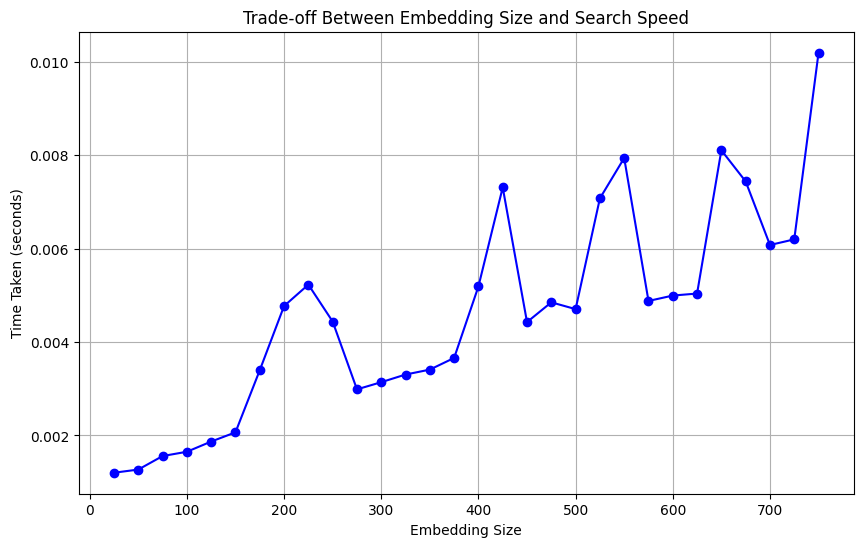

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(embedding_sizes, times, marker="o", linestyle="-", color="blue")
plt.title("Trade-off Between Embedding Size and Search Speed")
plt.xlabel("Embedding Size")
plt.ylabel("Time Taken (seconds)")
plt.grid(True)


# Display the graph
plt.show()